In [1]:
import sys
sys.path.insert(0, "../../python")

from propagation import plasma
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

In [2]:
# Testing the plasma_refraction function

# Initial electric field
def Efunc(x, y):
    # Input Gaussian beam
    w0 = 2e3
    r2 = x**2 + y**2
    E0 = np.exp(-r2 / w0**2)
    # Axicon lens
    alpha = np.radians(0.5)
    T0 = np.exp(-1j*np.pi*alpha*np.sqrt(r2))
    # Initial electric field
    return E0 * T0

# Temporal pulse
def Tfunc(t):
    from ionization import ionization
    tau = 35
    return ionization.gaussian_envelope(0.1, t, tau).real

# Setup the parameters
params = {'Nx' : 2**10,
          'Ny' : 2**8,
          'Nz' : 2**8,
          'Nt' : 2**6,
          'X' : 8000,
          'Y' : 8000,
          'Z' : 1e6,
          'T' : 100,
          'n0' : 1.0,
          'alpha' : 0.667,
          'EI' : 13.5984,
          'lam' : 0.8
          }

path = 'C:/Users/robert/Documents/Research/Data/Plasma_Refraction_Function/'
directory = 'intensity-0.1_density-' + str(params['n0'])

params['path'] = path + directory+'/'

if not os.path.exists(params['path']):
    os.makedirs(params['path'])
                
#plasma.plasma_refraction(params, Efunc, Tfunc)

In [8]:
path = 'C:/Users/robert/Documents/Research/Data/Plasma_Refraction/Func_Test/'
Eplot = np.load(path+'electricField.npy')
nplot = np.load(path+'ionizationFrac.npy')
fileParams = np.load(path+'params.npy').item()

In [9]:
print(fileParams)
fileParams['Nx']
print(params['path'])

{'Nx': 1024, 'Ny': 256, 'Nz': 256, 'Nt': 4, 'X': 8000, 'Y': 8000, 'Z': 1000000.0, 'T': 100, 'n0': 1.0, 'alpha': 0.667, 'EI': 13.5984, 'lam': 0.8, 'path': 'C:/Users/robert/Documents/Research/Data/Plasma_Refraction/Func_Test/'}
C:/Users/robert/Documents/Research/Data/Plasma_Refraction_Function/intensit-0.1_density-1.0


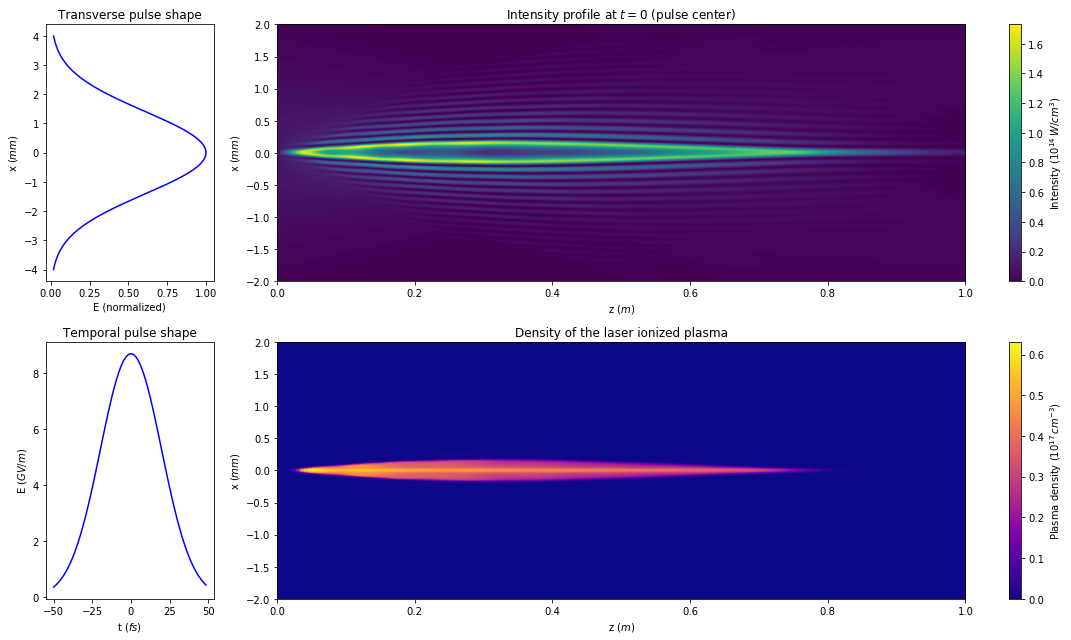

In [3]:
plasma.summary_plot(params['path'])